In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB38_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB38.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.047619
1,0.002903,0.047619
2,0.005805,0.142857
3,0.008708,0.047619
4,0.011611,0.190476
...,...,...
289,0.986937,0.000000
290,0.989840,0.000000
291,0.993469,0.000000
292,0.996372,0.000000


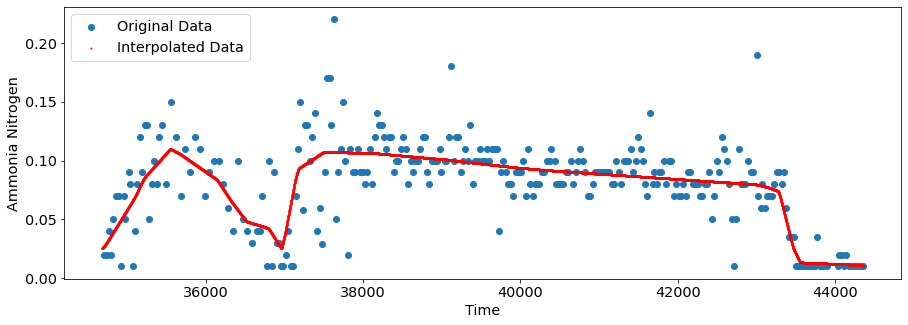

313/313 [==============================] - 0s 343us/step - loss: 4.2957e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.01
AN_max = 0.22
time_min = 34710.00      
time_max = 44356.35      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078682577
,0.084798877
,0.09112251
,0.097446142
,0.103769775
,0.110093407
,0.116520706
,0.122637007
,0.128960639
,0.135284272
,0.141607905
,0.147931537
,0.154358836
,0.160475136
,0.166798769
,0.173122402
,0.179446034
,0.185769667
,0.192196966
,0.198416932
,0.211064197
,0.955697856
,0.95880784
,0.962021489
])
interpolation

array([[0.4479514 ],
       [0.46916246],
       [0.4693321 ],
       [0.4593023 ],
       [0.4470287 ],
       [0.43346888],
       [0.41968668],
       [0.40657145],
       [0.3930115 ],
       [0.3794517 ],
       [0.3658918 ],
       [0.35233194],
       [0.32411563],
       [0.29548603],
       [0.26613313],
       [0.23975277],
       [0.21382484],
       [0.18789682],
       [0.17746216],
       [0.1718353 ],
       [0.15990674],
       [0.01162762],
       [0.01120384],
       [0.01071472]], dtype=float32)